In [ ]:
from Classifier import email_type_router_chain
from ComposingGenerator import email_generation_chain,EmailOutput
import json

In [9]:
query = "I need to reschedule our meeting to next Wednesday at 3 PM. Please confirm availability."

In [10]:
result = email_type_router_chain.invoke({"query": query})
print(result)

content='I will classify the email into one of the categories provided.' additional_kwargs={'id': '87eff105-9992-4e62-85ca-b271991a3d39', 'finish_reason': 'TOOL_CALL', 'tool_plan': 'I will classify the email into one of the categories provided.', 'tool_calls': [{'id': 'EmailClassifier_xzpyqxa6njts', 'type': 'function', 'function': {'name': 'EmailClassifier', 'arguments': '{"email_type":"Formal"}'}}], 'token_count': {'input_tokens': 1628.0, 'output_tokens': 50.0}} response_metadata={'id': '87eff105-9992-4e62-85ca-b271991a3d39', 'finish_reason': 'TOOL_CALL', 'tool_plan': 'I will classify the email into one of the categories provided.', 'tool_calls': [{'id': 'EmailClassifier_xzpyqxa6njts', 'type': 'function', 'function': {'name': 'EmailClassifier', 'arguments': '{"email_type":"Formal"}'}}], 'token_count': {'input_tokens': 1628.0, 'output_tokens': 50.0}} id='run-c7f50492-5a45-42c1-90f0-0a28d946633b-0' tool_calls=[{'name': 'EmailClassifier', 'args': {'email_type': 'Formal'}, 'id': 'EmailCla

In [11]:
result.additional_kwargs['tool_calls'][0]['function']['arguments']

'{"email_type":"Formal"}'

In [12]:
email_type_args = result.additional_kwargs['tool_calls'][0]['function']['arguments']
print(email_type_args)

{"email_type":"Formal"}


In [1]:
! pip install langchain_core

In [ ]:
from ComposingGenerator import email_generation_chain,EmailOutput
import json

In [2]:
email_details = """
From: alice@example.com
To: bob@example.com
Subject: Meeting Reschedule Request
"""

query = "I need to reschedule our meeting to next Wednesday at 3 PM. Please confirm availability."

# result = email_generation_chain.invoke({
#     "email_type": "Formal",
#     "email": email_details,
#     "query": query
# })
# response_data = json.loads(result.additional_kwargs['function_call']['arguments'])
# ordered_output = EmailOutput(**response_data).model_dump()
# print(ordered_output['Body'])
# print(json.dumps(ordered_output, indent=2))
# # print(result.additional_kwargs['function_call']['arguments'])

In [3]:
from Build_graph import compile_generate_agent

In [4]:
composer_agent = compile_generate_agent()

Compiling workflow...


In [5]:
response = composer_agent.invoke({
    "email": email_details,
    "query": query
})

In [6]:
response

{'email': '\nFrom: alice@example.com\nTo: bob@example.com\nSubject: Meeting Reschedule Request\n',
 'query': 'I need to reschedule our meeting to next Wednesday at 3 PM. Please confirm availability.',
 'email_type': '{"email_type":"Formal"}',
 'generate_email': {'From': 'alice@example.com',
  'To': 'bob@example.com',
  'Subject': 'Meeting Reschedule Request',
  'Body': 'Dear Bob,\n\nI am writing to request a reschedule of our meeting.  Due to unforeseen circumstances, I am unable to make our previously scheduled meeting. Would Wednesday at 3 PM work for you?\n\nPlease let me know if this time is convenient.\n\nSincerely,\nAlice'}}

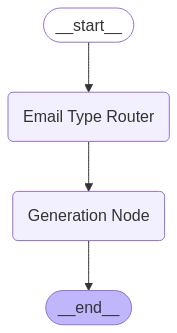

In [7]:
from IPython.display import display, Image
display(Image(composer_agent.get_graph(xray=True).draw_mermaid_png()))